In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading, Data Cleaning and Pre-processing


In [36]:
data=pd.read_excel('/content/drive/MyDrive/CapStone/AQI_Data_Model/CapStoneDataNew.xlsx')
data.head()


,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WS,WD,BP,AT,Diwali,AQI
0,2018-06-25,14,38,7,13.3,12.9,0,28.03,52,NaN,258,703,27.8,0,NaN
1,2018-06-26,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN
2,2018-06-27,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN
3,2018-06-28,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN
4,2018-06-29,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1873 non-null   datetime64[ns]
 1   PM2.5   1873 non-null   object        
 2   PM10    1873 non-null   object        
 3   NO      1873 non-null   object        
 4   NO2     1873 non-null   object        
 5   NOx     1873 non-null   object        
 6   CO      1873 non-null   object        
 7   Ozone   1873 non-null   object        
 8   RH      1873 non-null   object        
 9   WS      0 non-null      float64       
 10  WD      1873 non-null   object        
 11  BP      1873 non-null   object        
 12  AT      1873 non-null   object        
 13  Diwali  1873 non-null   int64         
 14  AQI     0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(11)
memory usage: 219.6+ KB


In [38]:
data.head(20)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WS,WD,BP,AT,Diwali,AQI
0,2018-06-25,14,38,7,13.3,12.9,0,28.03,52,NaN,258,703,27.8,0,NaN
1,2018-06-26,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN
2,2018-06-27,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN
3,2018-06-28,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN
4,2018-06-29,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN
5,2018-06-30,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN
6,2018-07-01,0,0,0,0,0,0,0,0,NaN,0,0,0,0,NaN
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.5,26,59.21,NaN,0,0,26.63,0,NaN
8,2018-07-03,19.43,51.9,4.44,7.26,11.11,0.47,20.66,67.84,NaN,0,0,25.45,0,NaN
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.42,17.11,69.34,NaN,0,0,24.98,0,NaN


In [39]:
data.replace(to_replace= "None" , value=np.nan, inplace=True)
data.head(10)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WS,WD,BP,AT,Diwali,AQI
0,2018-06-25,14.00,38.00,7.00,13.30,12.90,0.00,28.03,52.00,NaN,258.0,703.0,27.80,0,NaN
1,2018-06-26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.0,0.0,0.00,0,NaN
2,2018-06-27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.0,0.0,0.00,0,NaN
3,2018-06-28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.0,0.0,0.00,0,NaN
4,2018-06-29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.0,0.0,0.00,0,NaN
5,2018-06-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.0,0.0,0.00,0,NaN
6,2018-07-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.0,0.0,0.00,0,NaN
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.50,26.00,59.21,NaN,0.0,0.0,26.63,0,NaN
8,2018-07-03,19.43,51.90,4.44,7.26,11.11,0.47,20.66,67.84,NaN,0.0,0.0,25.45,0,NaN
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.42,17.11,69.34,NaN,0.0,0.0,24.98,0,NaN


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1873 non-null   datetime64[ns]
 1   PM2.5   1857 non-null   float64       
 2   PM10    1855 non-null   float64       
 3   NO      1852 non-null   float64       
 4   NO2     1852 non-null   float64       
 5   NOx     1852 non-null   float64       
 6   CO      1859 non-null   float64       
 7   Ozone   1859 non-null   float64       
 8   RH      1859 non-null   float64       
 9   WS      0 non-null      float64       
 10  WD      1866 non-null   float64       
 11  BP      1859 non-null   float64       
 12  AT      1860 non-null   float64       
 13  Diwali  1873 non-null   int64         
 14  AQI     0 non-null      float64       
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 219.6 KB


In [41]:
data_trial= data.copy()
data_trial.drop(['WS'],axis=1,inplace=True)
data_trial.head(10)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI
0,2018-06-25,14.00,38.00,7.00,13.30,12.90,0.00,28.03,52.00,258.0,703.0,27.80,0,NaN
1,2018-06-26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0,NaN
2,2018-06-27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0,NaN
3,2018-06-28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0,NaN
4,2018-06-29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0,NaN
5,2018-06-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0,NaN
6,2018-07-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0,NaN
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.50,26.00,59.21,0.0,0.0,26.63,0,NaN
8,2018-07-03,19.43,51.90,4.44,7.26,11.11,0.47,20.66,67.84,0.0,0.0,25.45,0,NaN
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.42,17.11,69.34,0.0,0.0,24.98,0,NaN


In [42]:
data_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1873 non-null   datetime64[ns]
 1   PM2.5   1857 non-null   float64       
 2   PM10    1855 non-null   float64       
 3   NO      1852 non-null   float64       
 4   NO2     1852 non-null   float64       
 5   NOx     1852 non-null   float64       
 6   CO      1859 non-null   float64       
 7   Ozone   1859 non-null   float64       
 8   RH      1859 non-null   float64       
 9   WD      1866 non-null   float64       
 10  BP      1859 non-null   float64       
 11  AT      1860 non-null   float64       
 12  Diwali  1873 non-null   int64         
 13  AQI     0 non-null      float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 205.0 KB


In [43]:
data_trial['CO'][0]=0.50

<ipython-input-43-dad29b55fd93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trial['CO'][0]=0.50


In [44]:
data_trial['PM2.5'][1],data_trial['PM10'][1],data_trial['NO'][1],data_trial['NO2'][1],data_trial['NOx'][1],data_trial['CO'][1],data_trial['Ozone'][1],data_trial['RH'][1],data_trial['WD'][1],data_trial['BP'][1],data_trial['AT'][1]=data_trial['PM2.5'][0],data_trial['PM10'][0],data_trial['NO'][0],data_trial['NO2'][0],data_trial['NOx'][0],data_trial['CO'][0],data_trial['Ozone'][0],data_trial['RH'][0],data_trial['WD'][0],data_trial['BP'][0],data_trial['AT'][0]
data_trial.head(7)

<ipython-input-44-323a36601961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trial['PM2.5'][1],data_trial['PM10'][1],data_trial['NO'][1],data_trial['NO2'][1],data_trial['NOx'][1],data_trial['CO'][1],data_trial['Ozone'][1],data_trial['RH'][1],data_trial['WD'][1],data_trial['BP'][1],data_trial['AT'][1]=data_trial['PM2.5'][0],data_trial['PM10'][0],data_trial['NO'][0],data_trial['NO2'][0],data_trial['NOx'][0],data_trial['CO'][0],data_trial['Ozone'][0],data_trial['RH'][0],data_trial['WD'][0],data_trial['BP'][0],data_trial['AT'][0]


,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI
0,2018-06-25,14.0,38.0,7.0,13.3,12.9,0.5,28.03,52.0,258.0,703.0,27.8,0,NaN
1,2018-06-26,14.0,38.0,7.0,13.3,12.9,0.5,28.03,52.0,258.0,703.0,27.8,0,NaN
2,2018-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,NaN
3,2018-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,NaN
4,2018-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,NaN
5,2018-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,NaN
6,2018-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,NaN


In [45]:
for i in range(1,7):
  data_trial['PM2.5'][i],data_trial['PM10'][i],data_trial['NO'][i],data_trial['NO2'][i],data_trial['NOx'][i],data_trial['CO'][i],data_trial['Ozone'][i],data_trial['RH'][i],data_trial['WD'][i],data_trial['BP'][i],data_trial['AT'][i]=data_trial['PM2.5'][i-1],data_trial['PM10'][i-1],data_trial['NO'][i-1],data_trial['NO2'][i-1],data_trial['NOx'][i-1],data_trial['CO'][i-1],data_trial['Ozone'][i-1],data_trial['RH'][i-1],data_trial['WD'][i-1],data_trial['BP'][i-1],data_trial['AT'][i-1]
data_trial.head(10)

<ipython-input-45-fe475b9e5753>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trial['PM2.5'][i],data_trial['PM10'][i],data_trial['NO'][i],data_trial['NO2'][i],data_trial['NOx'][i],data_trial['CO'][i],data_trial['Ozone'][i],data_trial['RH'][i],data_trial['WD'][i],data_trial['BP'][i],data_trial['AT'][i]=data_trial['PM2.5'][i-1],data_trial['PM10'][i-1],data_trial['NO'][i-1],data_trial['NO2'][i-1],data_trial['NOx'][i-1],data_trial['CO'][i-1],data_trial['Ozone'][i-1],data_trial['RH'][i-1],data_trial['WD'][i-1],data_trial['BP'][i-1],data_trial['AT'][i-1]


,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI
0,2018-06-25,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0,NaN
1,2018-06-26,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0,NaN
2,2018-06-27,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0,NaN
3,2018-06-28,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0,NaN
4,2018-06-29,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0,NaN
5,2018-06-30,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0,NaN
6,2018-07-01,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0,NaN
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.50,26.00,59.21,0.0,0.0,26.63,0,NaN
8,2018-07-03,19.43,51.90,4.44,7.26,11.11,0.47,20.66,67.84,0.0,0.0,25.45,0,NaN
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.42,17.11,69.34,0.0,0.0,24.98,0,NaN


In [46]:
data_trial.head(50)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI
0,2018-06-25,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.00,703.00,27.80,0,NaN
1,2018-06-26,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.00,703.00,27.80,0,NaN
2,2018-06-27,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.00,703.00,27.80,0,NaN
3,2018-06-28,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.00,703.00,27.80,0,NaN
4,2018-06-29,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.00,703.00,27.80,0,NaN
5,2018-06-30,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.00,703.00,27.80,0,NaN
6,2018-07-01,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.00,703.00,27.80,0,NaN
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.50,26.00,59.21,0.00,0.00,26.63,0,NaN
8,2018-07-03,19.43,51.90,4.44,7.26,11.11,0.47,20.66,67.84,0.00,0.00,25.45,0,NaN
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.42,17.11,69.34,0.00,0.00,24.98,0,NaN


In [47]:
data_trial.replace(0.00, np.nan, inplace=True)
data_trial.head(10)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI
0,2018-06-25,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,NaN,NaN
1,2018-06-26,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,NaN,NaN
2,2018-06-27,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,NaN,NaN
3,2018-06-28,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,NaN,NaN
4,2018-06-29,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,NaN,NaN
5,2018-06-30,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,NaN,NaN
6,2018-07-01,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,NaN,NaN
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.50,26.00,59.21,NaN,NaN,26.63,NaN,NaN
8,2018-07-03,19.43,51.90,4.44,7.26,11.11,0.47,20.66,67.84,NaN,NaN,25.45,NaN,NaN
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.42,17.11,69.34,NaN,NaN,24.98,NaN,NaN


In [48]:
data_trial['Diwali'].replace( np.nan,0.00, inplace=True)

In [49]:
data_trial.head(10)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI
0,2018-06-25,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0.0,NaN
1,2018-06-26,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0.0,NaN
2,2018-06-27,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0.0,NaN
3,2018-06-28,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0.0,NaN
4,2018-06-29,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0.0,NaN
5,2018-06-30,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0.0,NaN
6,2018-07-01,14.00,38.00,7.00,13.30,12.90,0.50,28.03,52.00,258.0,703.0,27.80,0.0,NaN
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.50,26.00,59.21,NaN,NaN,26.63,0.0,NaN
8,2018-07-03,19.43,51.90,4.44,7.26,11.11,0.47,20.66,67.84,NaN,NaN,25.45,0.0,NaN
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.42,17.11,69.34,NaN,NaN,24.98,0.0,NaN


In [50]:
data_trial['month-year'] = data_trial['Date'].dt.to_period('M')
mm= data_trial.groupby('month-year').aggregate({'PM2.5':'mean','PM10':'mean','NO':'mean','NO2':'mean','NOx':'mean','CO':'mean','Ozone':'mean','RH':'mean','WD':'mean','BP':'mean','AT':'mean'})
print(mm)

                PM2.5        PM10         NO        NO2        NOx        CO  \
month-year                                                                     
2018-06     14.000000   38.000000   7.000000  13.300000  12.900000  0.500000   
2018-07     15.409677   46.607419   4.496774  10.494194   9.539677  0.472333   
2018-08     12.975185   38.109630   5.203704  12.512593  10.775185  0.567037   
2018-09     21.401200   52.969600  19.858400  46.821200  41.040400  0.823600   
2018-10     71.158750  120.740000  17.797500  52.799375  42.503750  1.859375   
...               ...         ...        ...        ...        ...       ...   
2023-04     40.486333  104.237333   2.398667  11.036667   6.993000  0.306000   
2023-05     25.295385   62.103846   2.620000  11.427692   7.035000  0.331923   
2023-06     31.786667   44.668148   3.366429  11.118214   7.853571  0.197586   
2023-07     14.640000   35.738333   3.223043   5.650000   5.315652  0.291667   
2023-08     17.693000   50.095000   2.46

In [51]:
#Filling NaN values using monthly means
pd.to_datetime(data_trial['Date'],errors='ignore')

data_trial.tail(10)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI,month-year
1863,2023-08-01,19.07,47.41,2.56,11.73,7.28,2.90,20.15,76.00,218.52,734.24,24.13,0.0,NaN,2023-08
1864,2023-08-02,19.41,55.07,2.19,10.07,6.24,2.23,17.50,73.50,218.52,734.48,24.06,0.0,NaN,2023-08
1865,2023-08-03,19.01,45.95,2.05,9.43,5.86,2.00,16.39,73.25,218.52,734.17,24.26,0.0,NaN,2023-08
1866,2023-08-04,16.43,42.00,2.58,24.32,15.00,0.42,16.00,76.25,218.52,735.23,24.58,0.0,NaN,2023-08
1867,2023-08-05,15.50,42.24,2.50,22.36,13.92,0.84,16.38,77.00,218.52,736.21,24.26,0.0,NaN,2023-08
1868,2023-08-06,15.36,40.48,3.02,19.37,12.76,0.74,21.65,NaN,218.52,735.55,24.60,0.0,NaN,2023-08
1869,2023-08-07,16.75,49.97,NaN,NaN,NaN,0.65,17.98,NaN,218.52,734.32,24.86,0.0,NaN,2023-08
1870,2023-08-08,16.55,43.59,2.15,5.25,4.35,0.42,12.85,NaN,218.52,734.28,24.33,0.0,NaN,2023-08
1871,2023-08-09,20.67,73.83,2.70,11.22,8.10,0.76,15.94,NaN,218.52,735.19,25.43,0.0,NaN,2023-08
1872,2023-08-10,18.18,60.41,2.42,8.12,6.31,0.64,15.96,NaN,218.52,735.63,24.10,0.0,NaN,2023-08


In [52]:
for i in data_trial.index:
  if np.isnan(data_trial['PM2.5'][i]):
    data_trial['PM2.5'][i]=mm['PM2.5'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['PM10'][i]):
    data_trial['PM10'][i]=mm['PM10'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['NO'][i]):
    data_trial['NO'][i]=mm['NO'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['NO2'][i]):
    data_trial['NO2'][i]=mm['NO2'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['NOx'][i]):
    data_trial['NOx'][i]=mm['NOx'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['CO'][i]):
    data_trial['CO'][i]=mm['CO'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['Ozone'][i]):
    data_trial['Ozone'][i]=mm['Ozone'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['RH'][i]):
    data_trial['RH'][i]=mm['RH'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['WD'][i]):
    data_trial['WD'][i]=mm['WD'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['BP'][i]):
    data_trial['BP'][i]=mm['BP'][data_trial['Date'][i].to_period('M')]
  if np.isnan(data_trial['AT'][i]):
    data_trial['AT'][i]=mm['AT'][data_trial['Date'][i].to_period('M')]


<ipython-input-52-8d9e7c1d3449>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trial['WD'][i]=mm['WD'][data_trial['Date'][i].to_period('M')]
<ipython-input-52-8d9e7c1d3449>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trial['BP'][i]=mm['BP'][data_trial['Date'][i].to_period('M')]
<ipython-input-52-8d9e7c1d3449>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trial['CO'][i]=mm['CO'][data_trial['Date'][i].to_perio

In [53]:
data_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1873 non-null   datetime64[ns]
 1   PM2.5       1873 non-null   float64       
 2   PM10        1873 non-null   float64       
 3   NO          1873 non-null   float64       
 4   NO2         1873 non-null   float64       
 5   NOx         1873 non-null   float64       
 6   CO          1873 non-null   float64       
 7   Ozone       1873 non-null   float64       
 8   RH          1873 non-null   float64       
 9   WD          1873 non-null   float64       
 10  BP          1873 non-null   float64       
 11  AT          1873 non-null   float64       
 12  Diwali      1873 non-null   float64       
 13  AQI         0 non-null      float64       
 14  month-year  1873 non-null   period[M]     
dtypes: datetime64[ns](1), float64(13), period[M](1)
memory usage: 219.6 KB


In [54]:
#Calculating AQI
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

data_trial["PM2.5_SubIndex"] = data_trial["PM2.5"].apply(lambda x: get_PM25_subindex(x))

## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

data_trial["PM10_SubIndex"] = data_trial["PM10"].apply(lambda x: get_PM10_subindex(x))

# ## SO2 Sub-Index calculation
# def get_SO2_subindex(x):
#     if x <= 40:
#         return x * 50 / 40
#     elif x <= 80:
#         return 50 + (x - 40) * 50 / 40
#     elif x <= 380:
#         return 100 + (x - 80) * 100 / 300
#     elif x <= 800:
#         return 200 + (x - 380) * 100 / 420
#     elif x <= 1600:
#         return 300 + (x - 800) * 100 / 800
#     elif x > 1600:
#         return 400 + (x - 1600) * 100 / 800
#     else:
#         return 0

# data_trial["SO2_SubIndex"] = data_trial["SO2"].apply(lambda x: get_SO2_subindex(x))

## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

data_trial["NOx_SubIndex"] = data_trial["NOx"].apply(lambda x: get_NOx_subindex(x))

## NH3 Sub-Index calculation
# def get_NH3_subindex(x):
#     if x <= 200:
#         return x * 50 / 200
#     elif x <= 400:
#         return 50 + (x - 200) * 50 / 200
#     elif x <= 800:
#         return 100 + (x - 400) * 100 / 400
#     elif x <= 1200:
#         return 200 + (x - 800) * 100 / 400
#     elif x <= 1800:
#         return 300 + (x - 1200) * 100 / 600
#     elif x > 1800:
#         return 400 + (x - 1800) * 100 / 600
#     else:
#         return 0

# df2["NH3_SubIndex"] = df2["NH3"].apply(lambda x: get_NH3_subindex(x))

## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

data_trial["CO_SubIndex"] = data_trial["CO"].apply(lambda x: get_CO_subindex(x))

## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

data_trial["O3_SubIndex"] = data_trial["Ozone"].apply(lambda x: get_O3_subindex(x))

data_trial["AQI"] = round(data_trial[["PM2.5_SubIndex", "PM10_SubIndex",  "NOx_SubIndex",
                                  "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
data_trial.loc[data_trial["PM2.5_SubIndex"] + data_trial["PM10_SubIndex"] <= 0, "AQI"] = np.NaN



In [55]:
data_trial.tail(10)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI,month-year,PM2.5_SubIndex,PM10_SubIndex,NOx_SubIndex,CO_SubIndex,O3_SubIndex
1863,2023-08-01,19.07,47.41,2.560000,11.730000,7.280000,2.90,20.15,76.00,218.52,734.24,24.13,0.0,111.0,2023-08,31.783333,47.41,9.100000,111.250,20.15
1864,2023-08-02,19.41,55.07,2.190000,10.070000,6.240000,2.23,17.50,73.50,218.52,734.48,24.06,0.0,103.0,2023-08,32.350000,55.07,7.800000,102.875,17.50
1865,2023-08-03,19.01,45.95,2.050000,9.430000,5.860000,2.00,16.39,73.25,218.52,734.17,24.26,0.0,100.0,2023-08,31.683333,45.95,7.325000,100.000,16.39
1866,2023-08-04,16.43,42.00,2.580000,24.320000,15.000000,0.42,16.00,76.25,218.52,735.23,24.58,0.0,42.0,2023-08,27.383333,42.00,18.750000,21.000,16.00
1867,2023-08-05,15.50,42.24,2.500000,22.360000,13.920000,0.84,16.38,77.00,218.52,736.21,24.26,0.0,42.0,2023-08,25.833333,42.24,17.400000,42.000,16.38
1868,2023-08-06,15.36,40.48,3.020000,19.370000,12.760000,0.74,21.65,75.20,218.52,735.55,24.60,0.0,40.0,2023-08,25.600000,40.48,15.950000,37.000,21.65
1869,2023-08-07,16.75,49.97,2.463333,13.541111,8.868889,0.65,17.98,75.20,218.52,734.32,24.86,0.0,50.0,2023-08,27.916667,49.97,11.086111,32.500,17.98
1870,2023-08-08,16.55,43.59,2.150000,5.250000,4.350000,0.42,12.85,75.20,218.52,734.28,24.33,0.0,44.0,2023-08,27.583333,43.59,5.437500,21.000,12.85
1871,2023-08-09,20.67,73.83,2.700000,11.220000,8.100000,0.76,15.94,75.20,218.52,735.19,25.43,0.0,74.0,2023-08,34.450000,73.83,10.125000,38.000,15.94
1872,2023-08-10,18.18,60.41,2.420000,8.120000,6.310000,0.64,15.96,75.20,218.52,735.63,24.10,0.0,60.0,2023-08,30.300000,60.41,7.887500,32.000,15.96


In [56]:
data_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1873 non-null   datetime64[ns]
 1   PM2.5           1873 non-null   float64       
 2   PM10            1873 non-null   float64       
 3   NO              1873 non-null   float64       
 4   NO2             1873 non-null   float64       
 5   NOx             1873 non-null   float64       
 6   CO              1873 non-null   float64       
 7   Ozone           1873 non-null   float64       
 8   RH              1873 non-null   float64       
 9   WD              1873 non-null   float64       
 10  BP              1873 non-null   float64       
 11  AT              1873 non-null   float64       
 12  Diwali          1873 non-null   float64       
 13  AQI             1873 non-null   float64       
 14  month-year      1873 non-null   period[M]     
 15  PM2.

In [57]:
data_trial.drop(data_trial.iloc[:, 14:], inplace=True, axis=1)


In [58]:
data_trial.head(20)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI
0,2018-06-25,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0
1,2018-06-26,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0
2,2018-06-27,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0
3,2018-06-28,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0
4,2018-06-29,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0
5,2018-06-30,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0
6,2018-07-01,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.500000,26.00,59.21,237.375926,704.812222,26.63,0.0,43.0
8,2018-07-03,19.43,51.90,4.44,7.26,11.11,0.470000,20.66,67.84,237.375926,704.812222,25.45,0.0,52.0
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.420000,17.11,69.34,237.375926,704.812222,24.98,0.0,52.0


# Visualizing the Data

<Axes: xlabel='Date'>

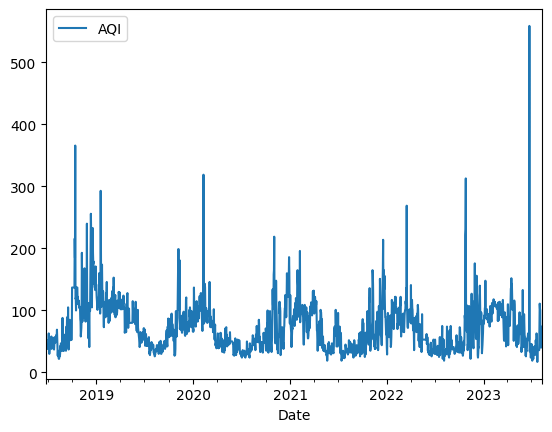

In [59]:

data_trial.plot('Date','AQI')

Text(0, 0.5, 'AQI')

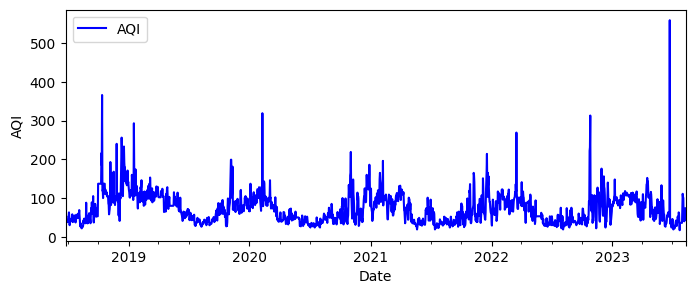

In [60]:
import matplotlib.pyplot as plt

%matplotlib inline
ax= data_trial.plot('Date','AQI', color='Blue',figsize=(8, 3))
ax.set_xlabel('Date')

ax.set_ylabel('AQI')

In [61]:
#Plotting monthly averages
data_trial['month-year'] = data_trial['Date'].dt.to_period('M')
mm= data_trial.groupby('month-year').aggregate({'AQI':'mean','AT':'mean'})
print(mm)

                   AQI         AT
month-year                       
2018-06      38.000000  27.800000
2018-07      46.580645  24.862581
2018-08      40.645161  24.465185
2018-09      60.166667  25.324800
2018-10     137.548387  28.550000
...                ...        ...
2023-04      99.366667  28.295000
2023-05      61.516129  26.286667
2023-06      63.666667  25.579655
2023-07      36.677419  23.658750
2023-08      66.600000  24.461000

[63 rows x 2 columns]


Text(0, 0.5, 'AQI')

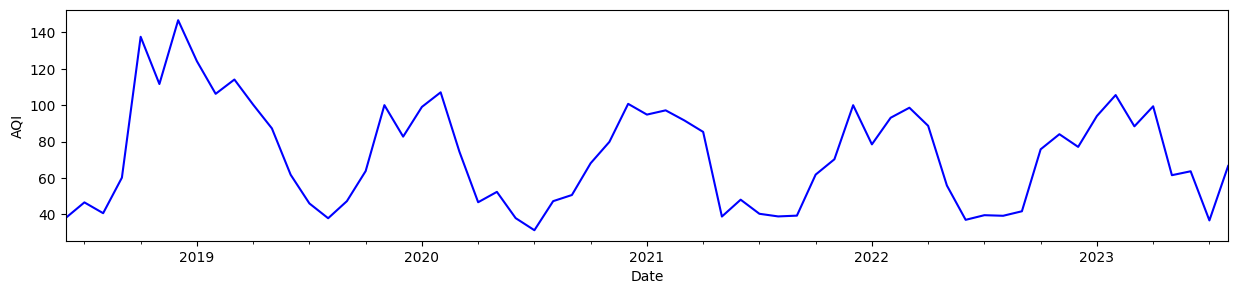

In [62]:
import matplotlib.pyplot as plt

%matplotlib inline
ax= mm['AQI'].plot(color='Blue',figsize=(15, 3))
ax.set_xlabel('Date')

ax.set_ylabel('AQI')

Text(0, 0.5, 'Average Temp')

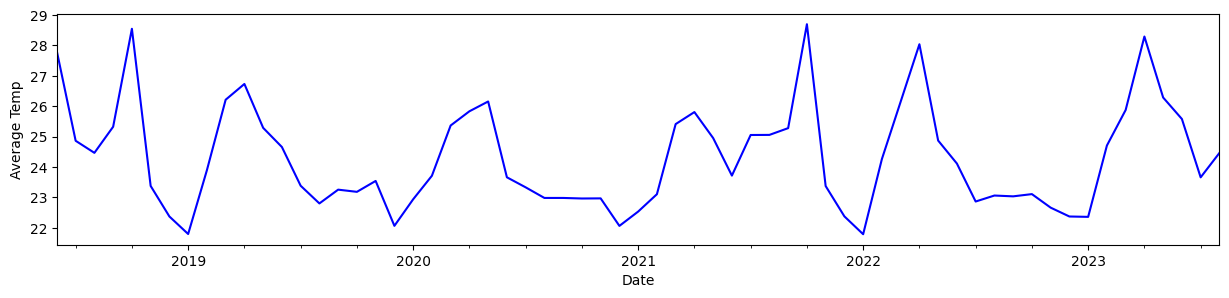

In [63]:
ax= mm['AT'].plot(color='Blue',figsize=(15, 3))
ax.set_xlabel('Date')

ax.set_ylabel('Average Temp')

In [64]:
print(data_trial.loc[1372])

Date          2022-03-28 00:00:00
PM2.5                       46.74
PM10                        90.96
NO                            1.9
NO2                         31.84
NOx                         23.82
CO                           0.74
Ozone                       34.33
RH                          53.62
WD                         162.01
BP                         709.05
AT                          27.47
Diwali                        0.0
AQI                          91.0
month-year                2022-03
Name: 1372, dtype: object


<ipython-input-65-c8c329234df9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data_trial[data_trial.columns[8:]].corr()


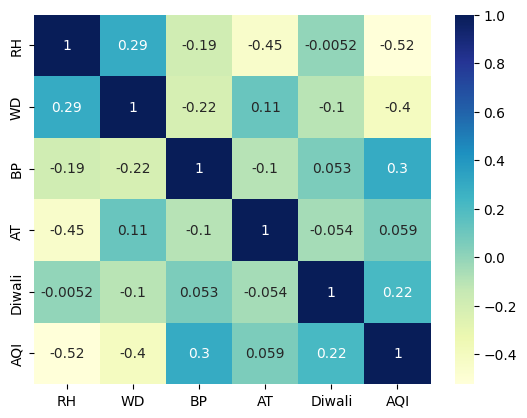

In [65]:
import seaborn as sb
cor=data_trial[data_trial.columns[8:]].corr()
dataplot = sb.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [66]:
#ADFuller test to check if daily data is stationary
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(data_trial['AQI'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)
#The results show that the data is stationary

Results of Dickey Fuller Test:
Test Statistic                -5.956853e+00
p-value                        2.083401e-07
#Lags Used                     9.000000e+00
Number of Observations Used    1.863000e+03
Critical Value (1%)           -3.433865e+00
Critical Value (5%)           -2.863093e+00
Critical Value (10%)          -2.567597e+00
dtype: float64


In [67]:
#ADFuller test to check if monthly data is stationary
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test:')
dftest = adfuller(mm['AQI'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)
#The results show that the data is stationary

Results of Dickey Fuller Test:
Test Statistic                -5.719971e+00
p-value                        6.977899e-07
#Lags Used                     4.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


# Predicting based on previous day

In [ ]:
shifted = pd.concat([data_trial.Date, data_trial.AQI, data_trial.AQI.shift(1)], axis = 1)
shifted.columns = ['Date', 'Actual', 'Pred']
shifted.head(2)

,Date,Actual,Pred
0,2018-06-25,38.0,NaN
1,2018-06-26,38.0,38.0


In [ ]:
shifted.corr()
# Around 80% correlation betwwen previous day and next day AQI, a simple method to predict AQI

<ipython-input-34-c7ba085525f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  shifted.corr()


,Actual,Pred
Actual,1.000000,0.801753
Pred,0.801753,1.000000


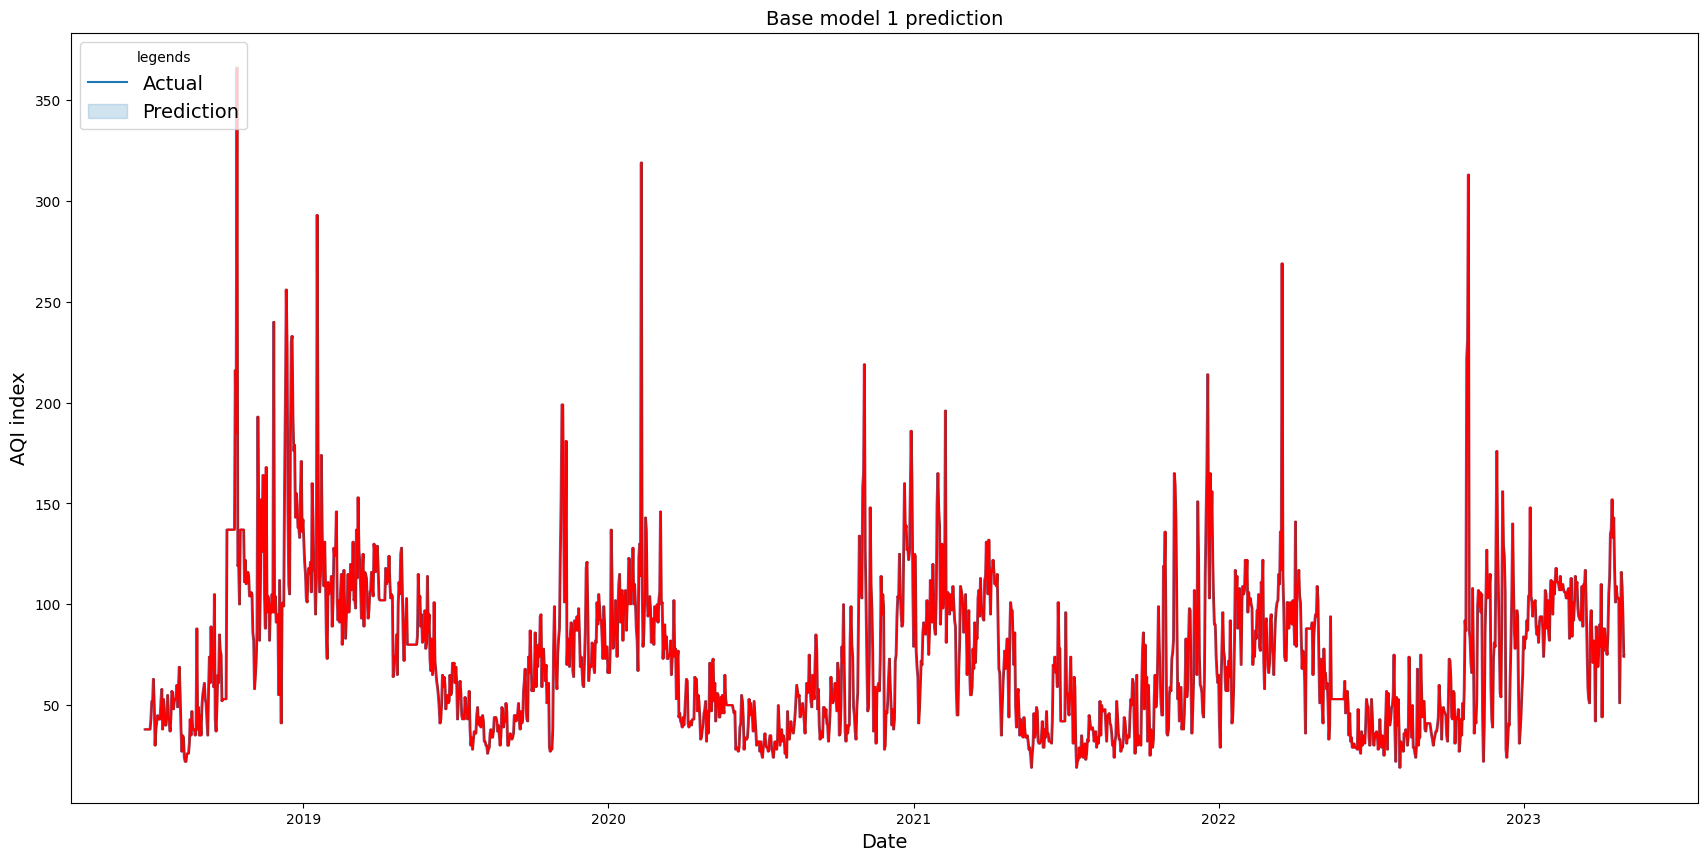

In [ ]:
plt.figure(figsize = (21,10))

sb.lineplot(data= shifted,x=shifted.Date, y=shifted.Actual, sort = False)
plot= sb.lineplot(data= shifted,x= shifted.Date, y= shifted.Pred, color = 'red')

plot.legend(title='legends', loc='upper left',
           labels=['Actual', 'Prediction'], fontsize = 14)


plot.set_ylabel('AQI index', fontsize = 14);
plot.set_xlabel('Date', fontsize = 14);
plot.set_title('Base model 1 prediction', fontsize = 14);



In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
base_error_1 = mean_squared_error(shifted[1:].Actual, shifted[1:].Pred)
print('The error of basic model is: {:.2f}'.format(base_error_1))

The error of basic model is: 577.05


# Auto Regression Model for predicting

In [ ]:

data_trial.head(20)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI,month-year
0,2018-06-25,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06
1,2018-06-26,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06
2,2018-06-27,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06
3,2018-06-28,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06
4,2018-06-29,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06
5,2018-06-30,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06
6,2018-07-01,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-07
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.500000,26.00,59.21,237.375926,704.812222,26.63,0.0,43.0,2018-07
8,2018-07-03,19.43,51.90,4.44,7.26,11.11,0.470000,20.66,67.84,237.375926,704.812222,25.45,0.0,52.0,2018-07
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.420000,17.11,69.34,237.375926,704.812222,24.98,0.0,52.0,2018-07


In [ ]:
from statsmodels.tsa.ar_model import AutoReg

#Finding the best lag, that is, the best number of previous days that can be used to predict future data
N = 100
train, test = data_trial.AQI[:-300], data_trial.AQI[-300:]

model = AutoReg(train, lags = 1, seasonal=True, trend = 'c', period = 365)
fitted_model = model.fit()
y_pred_autoreg = fitted_model.predict(start = list(test.index)[0],
                                    end = list(test.index)[-1],
                                    dynamic = False)
error = mean_squared_error(test, y_pred_autoreg)
best_n = 0
trend_ = 'c'
seasonal_ = True

# we know if there is any seasonality it will be 365 days period so we won't use a for loop for that.
for n in range(1, N):

    for trend in ['n', 'c', 't', 'ct']:

        for seasonal in [True, False]:
            model = AutoReg(train, lags = n, seasonal=seasonal, trend = trend,  period = 365)
            fitted_model = model.fit()
            y_pred_autoreg = fitted_model.predict(start = list(test.index)[0],
                                                  end = list(test.index)[-1],
                                                  dynamic = False)

            mse = mean_squared_error(test, y_pred_autoreg)

            if error > mse:
                error = mse
                best_n = n
                trend_ = trend
                seasonal_ = seasonal
print('The best number of previous records to use for prediction is: ', best_n)
print('The Trend parameter is: ', trend_)
print('The seasonal parameter is: ', seasonal_)
print('The best MSE is: ',error)

The best number of previous records to use for prediction is:  17
The Trend parameter is:  t
The seasonal parameter is:  False
The best MSE is:  917.9617679555143


In [ ]:
train = data_trial.AQI

model = AutoReg(train, lags = best_n, seasonal = seasonal_, period = 365, trend = trend_)
fitted_model = model.fit()
y_pred_autoreg = fitted_model.predict(start = list(train.index)[0],
                                      end = list(train.index)[-1],
                                      dynamic = False)
data_trial['AQI_pred_AR'] = y_pred_autoreg
autoreg_error_1 = mean_squared_error(data_trial.AQI_pred_AR[best_n:], data_trial.AQI[best_n:])
print('The error of the autoregression model is: {:.2f}'.format(autoreg_error_1))

The error of the autoregression model is: 488.12


In [ ]:
data_trial.head(20)

,Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WD,BP,AT,Diwali,AQI,month-year,AQI_pred_AR
0,2018-06-25,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06,NaN
1,2018-06-26,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06,NaN
2,2018-06-27,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06,NaN
3,2018-06-28,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06,NaN
4,2018-06-29,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06,NaN
5,2018-06-30,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-06,NaN
6,2018-07-01,14.00,38.00,7.00,13.30,12.90,0.500000,28.03,52.00,258.000000,703.000000,27.80,0.0,38.0,2018-07,NaN
7,2018-07-02,13.23,43.38,3.67,9.62,11.98,0.500000,26.00,59.21,237.375926,704.812222,26.63,0.0,43.0,2018-07,NaN
8,2018-07-03,19.43,51.90,4.44,7.26,11.11,0.470000,20.66,67.84,237.375926,704.812222,25.45,0.0,52.0,2018-07,NaN
9,2018-07-04,15.73,52.15,3.74,6.49,8.21,0.420000,17.11,69.34,237.375926,704.812222,24.98,0.0,52.0,2018-07,NaN


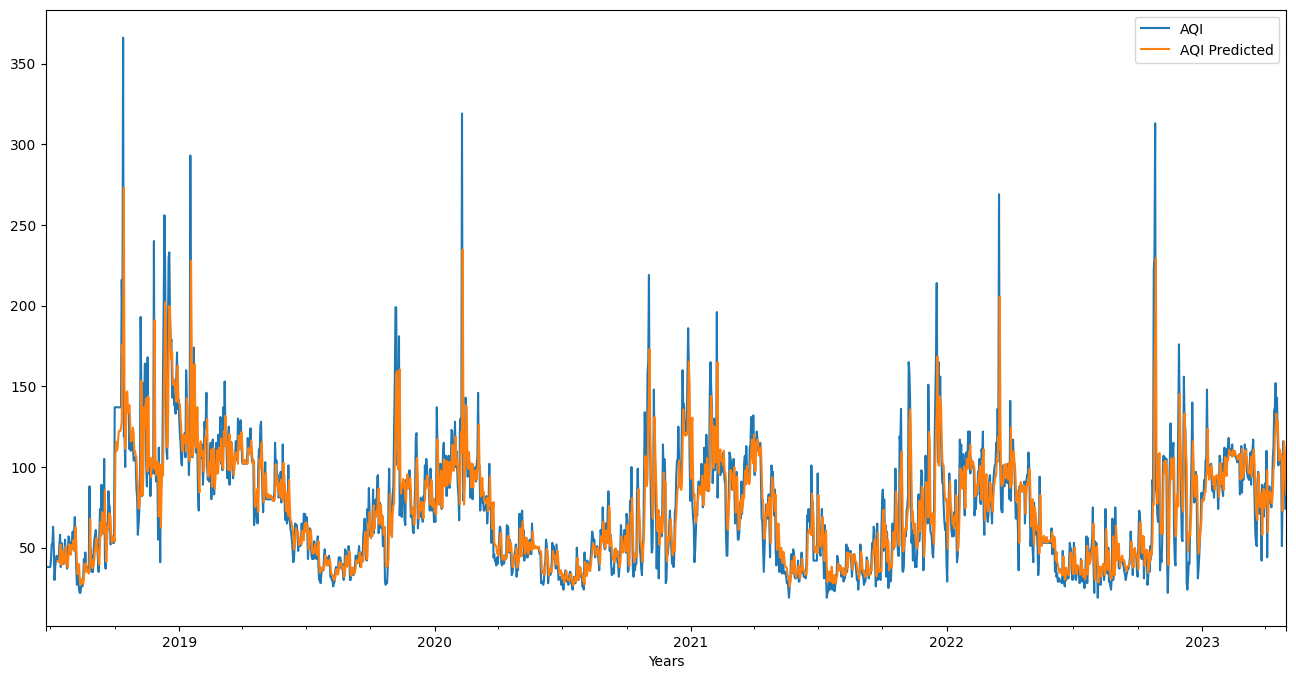

In [ ]:
#Visualizing the predicted and test values
data_plot=data_trial[['Date','AQI','AQI_pred_AR']].copy()
data_plot.set_index('Date',inplace=True)
plt.figure(figsize=(16, 8))
data_plot['AQI'].plot(label='AQI')
data_plot['AQI_pred_AR'].plot(label='AQI Predicted')

plt.xlabel('Years')
plt.legend()

In [ ]:
#Performance metrics of AutoReg model:
print("Mean Squared Error: ", mean_squared_error(data_trial.AQI_pred_AR[best_n:], data_trial.AQI[best_n:]))
print("Mean Absolute Error: ", mean_absolute_error(data_trial.AQI_pred_AR[best_n:], data_trial.AQI[best_n:]))




Mean Squared Error:  488.1182723394984
Mean Absolute Error:  13.15982786277805


# AutoReg model with exogenous features

In [ ]:
data_trial.drop(columns=['AQI_pred'],axis=1,inplace=True)

KeyError: ignored

In [ ]:
data_trial.info()


In [ ]:
N = 100
train, test = data_trial.AQI[:-300], data_trial.AQI[-300:]
exogtrain,exogtest= data_trial.AT[:-300],data_trial.AT[-300:]

model = AutoReg(train, lags = 1, seasonal=True, trend = 'c',exog=exogtrain, period = 365)
fitted_model = model.fit()
y_pred_autoreg = fitted_model.predict(start = list(test.index)[0], end = list(test.index)[-1], exog=exogtest, dynamic = False)
error = mean_squared_error(test, y_pred_autoreg)
best_n = 0
trend_ = 'c'
seasonal_ = True

# we know if there is any seasonality it will be 365 days period so we won't use a for loop for that.
for n in range(1, N):

    for trend in ['n', 'c', 't', 'ct']:

        for seasonal in [True, False]:
            model = AutoReg(train, lags = n, seasonal=seasonal, trend = trend, exog=exogtrain, period = 365)
            fitted_model = model.fit()
            y_pred_autoreg = fitted_model.predict(start = list(test.index)[0],
                                                  end = list(test.index)[-1],
                                                  exog=data_trial['AT'],
                                                  dynamic = False)

            mse = mean_squared_error(test, y_pred_autoreg)

            if error > mse:
                error = mse
                best_n = n
                trend_ = trend
                seasonal_ = seasonal
print('The best number of previous records to use for prediction is: ', best_n)
print('The Trend parameter is: ', trend_)
print('The seasonal parameter is: ', seasonal_)

# ARMA model

In [ ]:
dt=data_trial[['Date','AQI']].copy()
dt.set_index('Date',inplace=True)
dt.head(10)

,AQI
Date,
2018-06-25,38.0
2018-06-26,38.0
2018-06-27,38.0
2018-06-28,38.0
2018-06-29,38.0
2018-06-30,38.0
2018-07-01,38.0
2018-07-02,43.0
2018-07-03,52.0


In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.7 MB/s eta 0:00:00


In [ ]:
#arima model without seasonality with d=0

traind,testd=dt.AQI[:-400],dt.AQI[-400:]
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# no_s_model=auto_arima(y=traind,seasonal=False,p=1,d=0,q=1)
# no_s_model.fit(traind)
# y_pred=no_s_model.predict(len(testd))
# error= mean_squared_error(testd, y_pred)

# for p in range(3,6):
#   for q in range(1,3):
#     no_s_model=auto_arima(y=traind,seasonal=False,p=p,d=0,q=q)
#     no_s_model.fit(traind)
#     y_pred=no_s_model.predict(len(testd))
#     mse= mean_squared_error(testd, y_pred)
#     print('p=',p,' q=',q,' error=',mse)

#     if mse<error:
#       error=mse
#       p=p
#       q=q
# print('The best model has p=',p,' q=',q,' error=',mse)

history = [x for x in traind]
predictions = list()
d=0
for p in range(3,6):
   for q in range(1,3):
     history = [x for x in traind]
     predictions = list()
     for t in range(len(testd)):
       model = ARIMA(history, order=(p,d,q),trend='t')
       model_fit = model.fit()
       pred = model_fit.forecast()
       yhat = pred[0]
       predictions.append(yhat)

       obs = testd[t]
       history.append(obs)

     mse= mean_squared_error(testd, predictions)
     print('p=',p,' q=',q,' error=',mse)

#The best model is model with p=4 and q=1


KeyboardInterrupt: ignored

In [ ]:
#Training only the best model
from sklearn.metrics import mean_squared_error,mean_absolute_error
traind,testd=dt.AQI[:-400],dt.AQI[-400:]
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

history = [x for x in traind]
predictions = list()
for t in range(len(testd)):
       model = ARIMA(history, order=(4,0,1),trend='t')
       model_fit = model.fit()
       pred = model_fit.forecast()
       yhat = pred[0]
       predictions.append(yhat)

       obs = testd[t]
       history.append(obs)

mse= mean_squared_error(testd, predictions)
print('p=',4,' q=',1,' error=',mse)
predictions=pd.DataFrame(data=predictions, index=testd.index,columns='Prediction')

p= 4  q= 1  error= 449.86174165033503


In [ ]:
pred=pd.DataFrame(data=predictions, index=testd.index ,columns=['Prediction'])

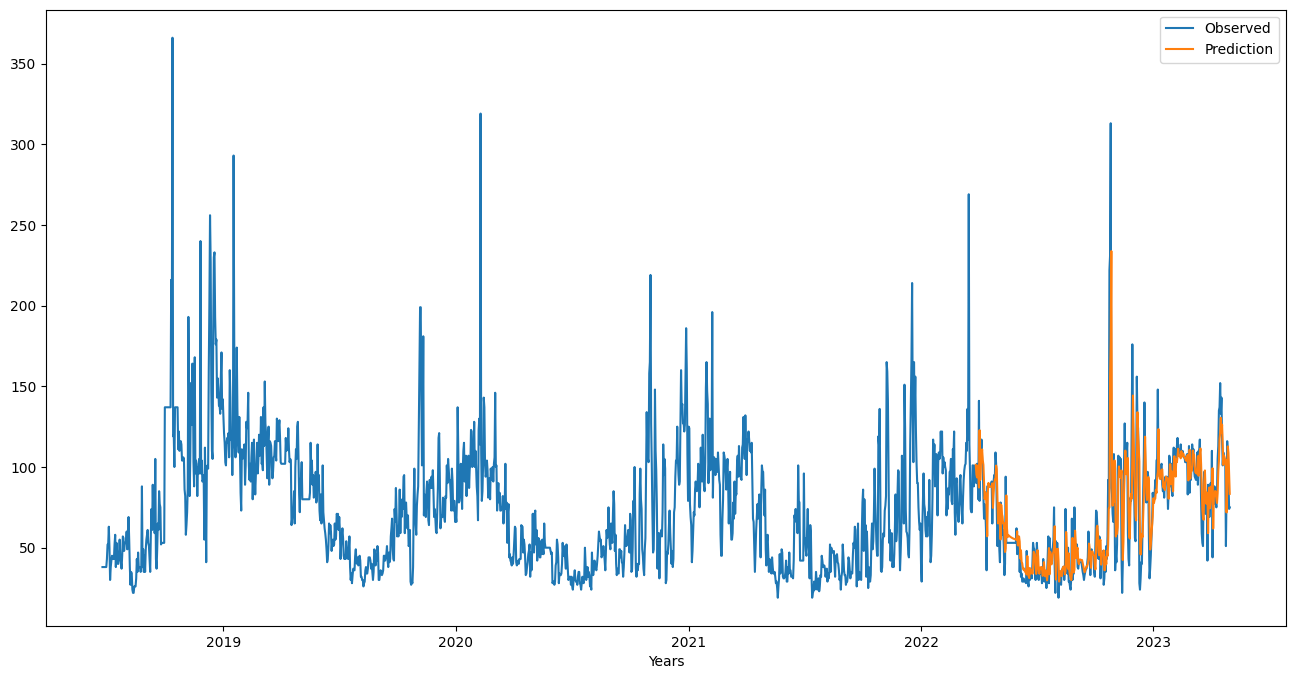

In [ ]:
#plotting the above arima model
plt.figure(figsize=(16, 8))
plt.plot(dt, label='Observed')
plt.plot(pred, label='Prediction')


plt.xlabel('Years')
plt.legend()
plt.show()

#ARIMA Model


In [ ]:
dt=data_trial[['Date','AQI']].copy()
dt.set_index('Date',inplace=True)
dt.head(10)

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#arima model without seasonality with d=1
from sklearn.metrics import mean_squared_error,mean_absolute_error
traind,testd=dt.AQI[:-400],dt.AQI[-400:]
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
history = [x for x in traind]
predictions = list()
d=1
for p in range(3,6):
   for q in range(1,3):
     history = [x for x in traind]
     predictions = list()
     for t in range(len(testd)):
       model = ARIMA(history, order=(p,d,q),trend='t')
       model_fit = model.fit()
       pred = model_fit.forecast()
       yhat = pred[0]
       predictions.append(yhat)

       obs = testd[t]
       history.append(obs)

     mse= mean_squared_error(testd, predictions)
     print('p=',p,' q=',q,' error=',mse)
#The best model is model with p=3, d=1, q=1

p= 3  q= 1  error= 449.77593524668833
p= 3  q= 2  error= 449.86829508220416
p= 4  q= 1  error= 450.5965058489543
p= 4  q= 2  error= 451.48508737191264
p= 5  q= 1  error= 453.2894112490992


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


p= 5  q= 2  error= 454.6663086792718


In [ ]:
#training only the best model with d=1
from sklearn.metrics import mean_squared_error,mean_absolute_error
traind,testd=dt.AQI[:-400],dt.AQI[-400:]
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

history = [x for x in traind]
predictions = list()
for t in range(len(testd)):
       model = ARIMA(history, order=(3,1,1),trend='t')
       model_fit = model.fit()
       pred = model_fit.forecast()
       yhat = pred[0]
       predictions.append(yhat)

       obs = testd[t]
       history.append(obs)

mse= mean_squared_error(testd, predictions)
print('p=',3,' q=',1,' error=',mse)
predictions=pd.DataFrame(data=predictions, index=testd.index,columns=['Prediction'])

p= 3  q= 1  error= 449.77593524668833


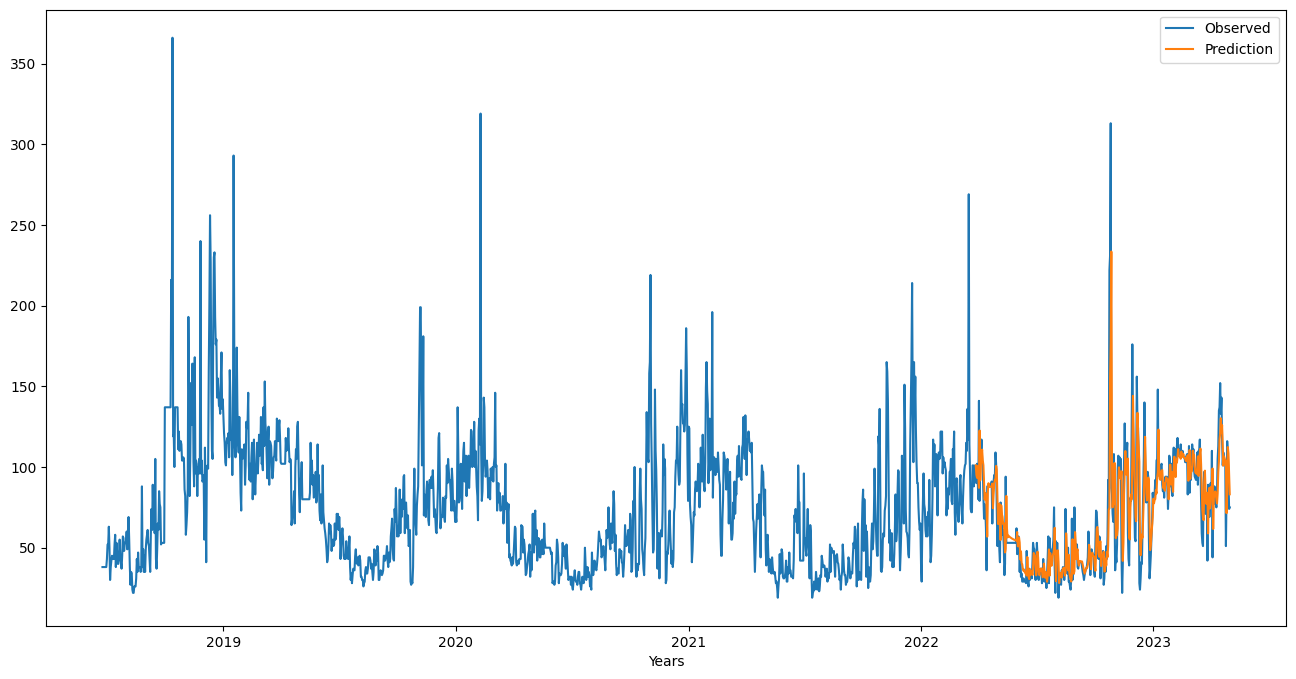

In [ ]:

#plotting the above arima model
plt.figure(figsize=(16, 8))
plt.plot(dt, label='Observed')
plt.plot(predictions, label='Prediction')


plt.xlabel('Years')
plt.legend()
plt.show()

# ARMA Model with eXogenous Regressors (ARMAX)

In [ ]:
dt=data_trial[['Date','AT','Diwali','RH','WD','BP','AQI']].copy()
dt.set_index('Date',inplace=True)
dt.head(10)

,AT,Diwali,RH,WD,BP,AQI
Date,,,,,,
2018-06-25,27.80,0.0,52.00,258.000000,703.000000,38.0
2018-06-26,27.80,0.0,52.00,258.000000,703.000000,38.0
2018-06-27,27.80,0.0,52.00,258.000000,703.000000,38.0
2018-06-28,27.80,0.0,52.00,258.000000,703.000000,38.0
2018-06-29,27.80,0.0,52.00,258.000000,703.000000,38.0
2018-06-30,27.80,0.0,52.00,258.000000,703.000000,38.0
2018-07-01,27.80,0.0,52.00,258.000000,703.000000,38.0
2018-07-02,26.63,0.0,59.21,237.375926,704.812222,43.0
2018-07-03,25.45,0.0,67.84,237.375926,704.812222,52.0


In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.1 MB/s eta 0:00:00


In [ ]:

traind,testd=dt.AQI[:-400],dt.AQI[-400:]
trainexog,testexog=dt.AT[:-400],dt.AT[-400:]
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

history = [x for x in traind]
exog = [x for x in trainexog]
predictions = list()
for t in range(len(testd)):
       model = ARIMA(history, order=(4,0,1),trend='t',exog=exog)
       model_fit = model.fit()
       pred = model_fit.forecast(exog=testexog[t])[0]

       predictions.append(pred)

       obs = testd[t]
       history.append(obs)
       exog.append(testexog[t])

mse= mean_squared_error(testd, predictions)
print('p=',3,' q=',1,' error=',mse)
predictions=pd.DataFrame(data=predictions, index=testd.index,columns=['Prediction'])

p= 3  q= 1  error= 421.2098277412572


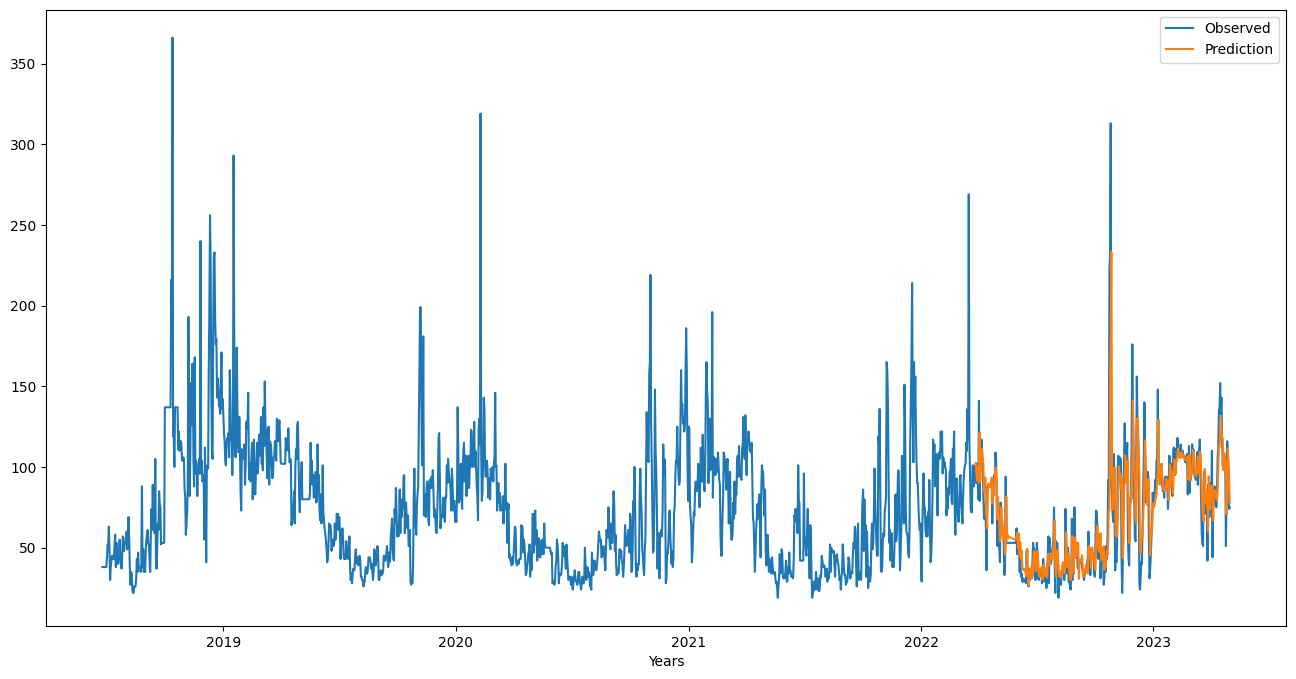

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(dt['AQI'], label='Observed')
plt.plot(predictions, label='Prediction')


plt.xlabel('Years')
plt.legend()
plt.show()

In [ ]:
traind,testd=dt.AQI[:-400],dt.AQI[-400:]
trainexog,testexog=dt.loc['2018-06-25':'2022-03-27', ['AT', 'Diwali']],dt.loc['2022-03-27':'2022-05-1', ['AT', 'Diwali']]
exog=list()
for ind in trainexog.index:
   exog.append((trainexog['AT'][ind],trainexog['Diwali'][ind]))
print(exog)

[(27.8, 0.0), (27.8, 0.0), (27.8, 0.0), (27.8, 0.0), (27.8, 0.0), (27.8, 0.0), (27.8, 0.0), (26.63, 0.0), (25.45, 0.0), (24.98, 0.0), (25.39, 0.0), (24.49, 0.0), (24.52, 0.0), (24.14, 0.0), (24.28, 0.0), (24.3, 0.0), (24.69, 0.0), (24.43, 0.0), (24.42, 0.0), (24.48, 0.0), (24.94, 0.0), (24.25, 0.0), (24.36, 0.0), (24.95, 0.0), (24.75, 0.0), (24.57, 0.0), (24.25, 0.0), (24.88, 0.0), (24.43, 0.0), (24.89, 0.0), (24.71, 0.0), (24.95, 0.0), (24.7, 0.0), (24.85, 0.0), (25.22, 0.0), (25.22, 0.0), (24.82, 0.0), (24.18, 0.0), (24.89, 0.0), (24.63, 0.0), (24.52, 0.0), (25.05, 0.0), (24.69, 0.0), (24.09, 0.0), (24.17, 0.0), (24.74, 0.0), (24.5, 0.0), (24.08, 0.0), (23.79, 0.0), (23.68, 0.0), (23.92, 0.0), (24.28, 0.0), (24.56, 0.0), (24.75, 0.0), (24.83, 0.0), (24.84, 0.0), (24.44, 0.0), (24.465185185185184, 0.0), (24.465185185185184, 0.0), (24.23, 0.0), (23.85, 0.0), (24.465185185185184, 0.0), (24.25, 0.0), (24.465185185185184, 0.0), (25.27, 0.0), (24.52, 0.0), (24.89, 0.0), (24.92, 0.0), (25.1

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
traind,testd=dt.AQI[:-400],dt.AQI[-400:]
trainexog,testexog=dt.loc['2018-06-25':'2022-03-27', ['AT', 'Diwali']],dt.loc['2022-03-27':'2023-05-1', ['AT', 'Diwali']]
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

history = [x for x in traind]
exog=list()
for ind in trainexog.index:
   exog.append((trainexog['AT'][ind],trainexog['Diwali'][ind]))

predictions = list()
for t in testd.index:
       model = ARIMA(history, order=(4,0,1),trend='t',exog=exog)
       model_fit = model.fit()
       pred = model_fit.forecast(exog=(testexog['AT'][t],testexog['Diwali'][t]))[0]

       predictions.append(pred)

       obs = testd[t]
       history.append(obs)
       exog.append((testexog['AT'][t],testexog['Diwali'][t]))

mse= mean_squared_error(testd, predictions)
print('p=',3,' q=',1,' error=',mse)
predictions=pd.DataFrame(data=predictions, index=testd.index,columns=['Prediction'])

p= 3  q= 1  error= 320.1251542063676


In [ ]:
#Saving the model
import pickle
path='/content/drive/MyDrive/CapStone/8th Sem/saved_ARMAX_ATandDiwali.pkl'
pickle.dump(model_fit,open(path,'wb'))

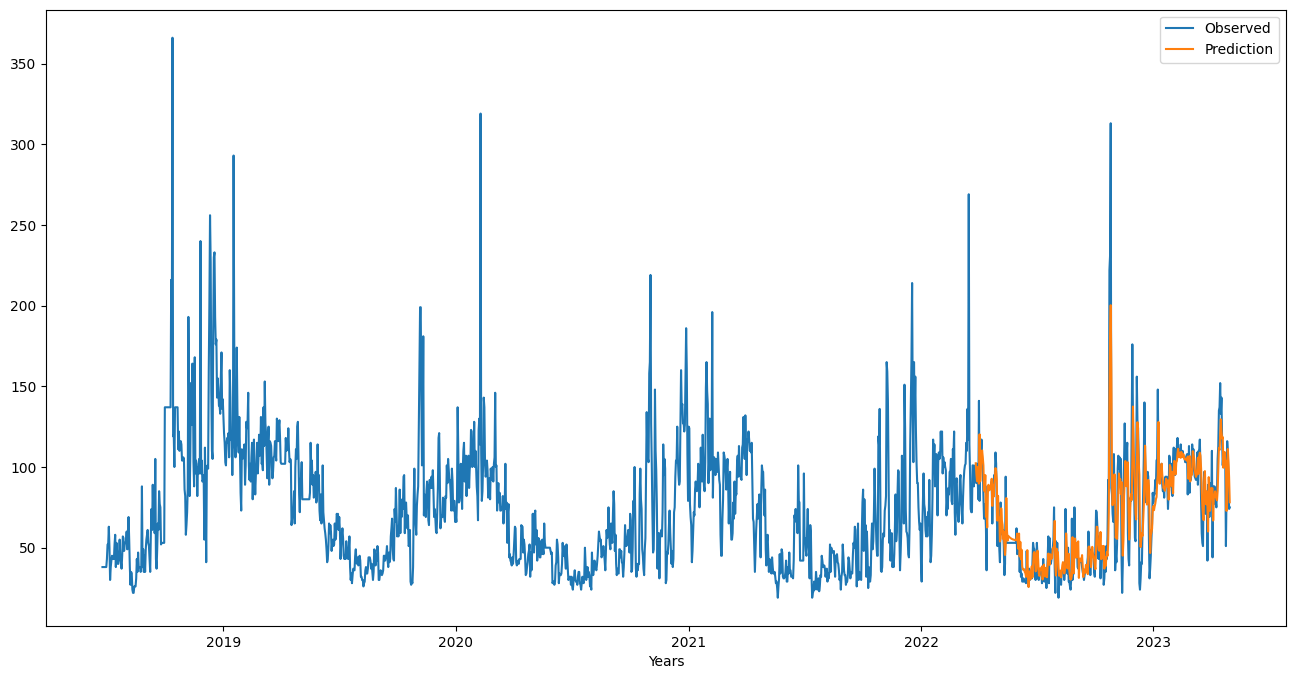

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(dt['AQI'], label='Observed')
plt.plot(predictions, label='Prediction')


plt.xlabel('Years')
plt.legend()
plt.show()

# ARMAX Best Model

In [68]:
dt=data_trial[['Date','AT','Diwali','RH','WD','BP','AQI']].copy()
dt.set_index('Date',inplace=True)
dt.tail(5)

,AT,Diwali,RH,WD,BP,AQI
Date,,,,,,
2023-08-06,24.60,0.0,75.2,218.52,735.55,40.0
2023-08-07,24.86,0.0,75.2,218.52,734.32,50.0
2023-08-08,24.33,0.0,75.2,218.52,734.28,44.0
2023-08-09,25.43,0.0,75.2,218.52,735.19,74.0
2023-08-10,24.10,0.0,75.2,218.52,735.63,60.0


In [69]:
!pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [71]:
traind,testd=dt.AQI[:-410],dt.AQI[-410:]
trainexog,testexog=dt.loc['2018-06-25':'2022-06-26', ['AT', 'Diwali','RH']],dt.loc['2022-06-27':'2023-08-10', ['AT', 'Diwali','RH']]
print(len(traind),len(trainexog))
print(len(testd),len(testexog))
print(traind.tail(1))
print(trainexog.tail(1))

1463 1463
410 410
Date
2022-06-26    53.0
Name: AQI, dtype: float64
              AT  Diwali     RH
Date                           
2022-06-26  23.7     0.0  71.67


In [72]:
#Training Model using RH and WD as exogenous features
from sklearn.metrics import mean_squared_error,mean_absolute_error
Mse=125.52
traind,testd=dt.AQI[:-410],dt.AQI[-410:]
trainexog,testexog=dt.loc['2018-06-25':'2022-06-26', ['AT', 'Diwali','RH']],dt.loc['2022-06-27':'2023-08-10', ['AT', 'Diwali','RH']]
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

history = [x for x in traind]
exog=list()
for ind in trainexog.index:
   exog.append((trainexog['AT'][ind],trainexog['Diwali'][ind],trainexog['RH'][ind]))

predictions = list()
for t in testd.index:
       model = ARIMA(history, order=(4,0,1),trend='t',exog=exog)
       model_fit = model.fit()
       pred = model_fit.forecast(exog=(testexog['AT'][t],testexog['Diwali'][t],testexog['RH'][t]))[0]

       predictions.append(pred)

       obs = testd[t]
       history.append(obs)
       exog.append((testexog['AT'][t],testexog['Diwali'][t],testexog['RH'][t]))

mse= mean_squared_error(testd, predictions)
print('p=',4,' q=',1,' error=',mse)
predictions=pd.DataFrame(data=predictions, index=testd.index,columns=['Prediction'])

p= 4  q= 1  error= 1176.530456182041


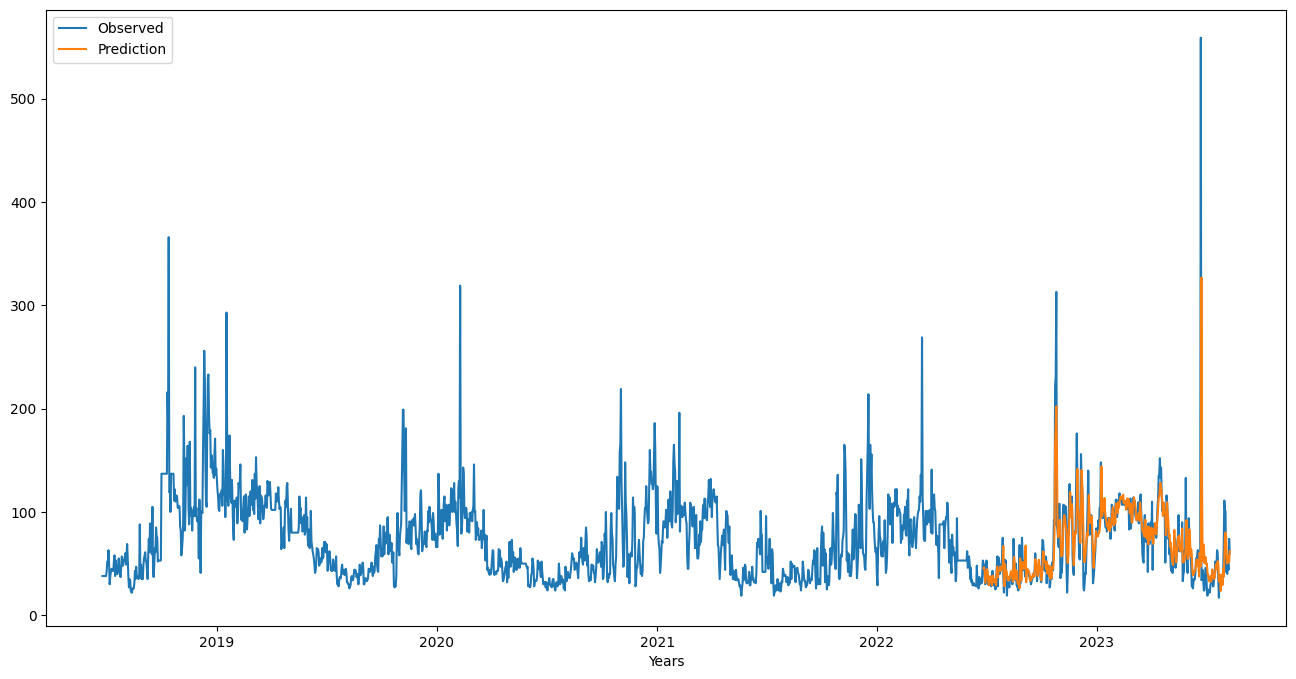

In [73]:
plt.figure(figsize=(16, 8))
plt.plot(dt['AQI'], label='Observed')
plt.plot(predictions, label='Prediction')


plt.xlabel('Years')
plt.legend()
plt.show()

In [74]:
import pickle

In [75]:
#SAVING THE BEST MODEL
path='/content/drive/MyDrive/CapStone/8th Sem/saved_ARMAX_best.pkl'
saved_model=pickle.dump(model_fit,open(path,'wb'))

In [76]:
#Loading the model
loaded_model = pickle.load(open('/content/drive/MyDrive/CapStone/8th Sem/saved_ARMAX_best.pkl','rb'))

In [81]:
fore=pd.read_excel('/content/drive/MyDrive/CapStone/AQI_Data_Model/Forecast_Data.xlsx')
fore.set_index('Date',inplace=True)
fore.columns=['AT','Diwali','RH']

In [82]:
fore

,AT,Diwali,RH
Date,,,
2023-08-11,24.5,0,76.0
2023-08-12,24.0,0,73.5
2023-08-13,25.5,0,71.0
2023-08-14,25.0,0,68.0
2023-08-15,25.0,0,66.5
2023-08-16,25.5,0,68.0


In [83]:

pred=list()
for t in fore.index:
  p=loaded_model.forecast(exog=(fore['AT'][t],fore['Diwali'][t],fore['RH'][t]))[0]
  pred.append(p)
print(pred)

[60.95396770820711, 64.47623470029379, 65.91496370488275, 70.03750719601189, 71.83833669313921, 69.51662269913746]


In [ ]:
fore['Forecasted_AQI']= pred
fore

,AT,Diwali,RH,Forecasted_AQI
Date,,,,
2023-05-02,25.95,0,73.63,72.237337
2023-05-03,24.46,0,74.23,71.677272
2023-05-04,24.77,0,77.18,68.803183
2023-05-06,24.32,0,74.02,71.883728


In [ ]:
fore.to_excel('/content/drive/MyDrive/CapStone/7th Sem/AQI_Data/Forecast_Data.xlsx')

In [ ]:
#Training with new data of one day
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

ex= dt.loc['2018-06-25':'2023-06-04', ['AT', 'Diwali','RH']]
history = [x for x in dt.AQI[:]]
exog=list()
for ind in ex.index:
   exog.append((ex['AT'][ind],ex['Diwali'][ind],ex['RH'][ind]))
predictions = list()


loaded_model = ARIMA(history, order=(4,0,1),trend='t',exog=exog)
model_fit = loaded_model.fit()




In [ ]:
fore=data=pd.read_excel('/content/drive/MyDrive/CapStone/7th Sem/AQI_Data/Forecast_Data.xlsx')
fore.set_index('Date',inplace=True)
fore.columns=['AT','Diwali','RH']
fore

,AT,Diwali,RH
Date,,,
2023-06-05,28.12,0,64.0
2023-06-06,26.00,0,72.0
2023-06-07,25.50,0,73.0
2023-06-08,25.50,0,76.0
2023-06-09,25.50,0,74.5


In [ ]:
#predicting
pred=list()
for t in fore.index:
  p=model_fit.forecast(exog=(fore['AT'][t],fore['Diwali'][t],fore['RH'][t]))[0]
  pred.append(p)
print(pred)

[74.23923680222886, 66.43997173158785, 65.49076407504735, 62.479095505704876, 63.984929790376114]


In [ ]:
#Saving the new model
import pickle
path='/content/drive/MyDrive/CapStone/8th Sem/saved_ARMAX_best.pkl'
saved_model=pickle.dump(model_fit,open(path,'wb'))

#ARMAX other Models

In [ ]:
#Training Model using RH and WD as exogenous features
from sklearn.metrics import mean_squared_error,mean_absolute_error
traind,testd=dt.AQI[:-400],dt.AQI[-400:]
trainexog,testexog=dt.loc['2018-06-25':'2022-03-27',['AT','Diwali','BP','RH', 'WD']],dt.loc['2022-03-27':'2023-05-1',['AT','Diwali','BP','RH', 'WD']]
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

history = [x for x in traind]
exog=list()
for ind in trainexog.index:
   exog.append([trainexog['AT'][ind],trainexog['Diwali'][ind],trainexog['RH'][ind],trainexog['WD'][ind],trainexog['BP'][ind]])

predictions = list()
for t in testd.index:
       model = ARIMA(history, order=(4,0,1),trend='t',exog=exog)
       model_fit = model.fit()
       pred = model_fit.forecast(exog=(testexog['AT'][t],testexog['Diwali'][t],testexog['RH'][t],testexog['WD'][t],testexog['BP'][t]))[0]

       predictions.append(pred)

       obs = testd[t]
       history.append(obs)
       exog.append([testexog['AT'][t],testexog['Diwali'][t],testexog['RH'][t],testexog['WD'][t],testexog['BP'][t]])

mse= mean_squared_error(testd, predictions)
print('p=',4,' q=',1,' error=',mse)
predictions=pd.DataFrame(data=predictions, index=testd.index,columns=['Prediction'])

p= 4  q= 1  error= 295.075983844947


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
traind=dt.AQI[:]
exogenous=dt.loc['2018-06-25':'2023-05-1',['AT','Diwali','BP','RH']]
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)


In [ ]:
#Saving the model
import pickle
path='/content/drive/MyDrive/CapStone/8th Sem/saved_ARMAX_Allexog.pkl'
pickle.dump(model_fit,open(path,'wb'))

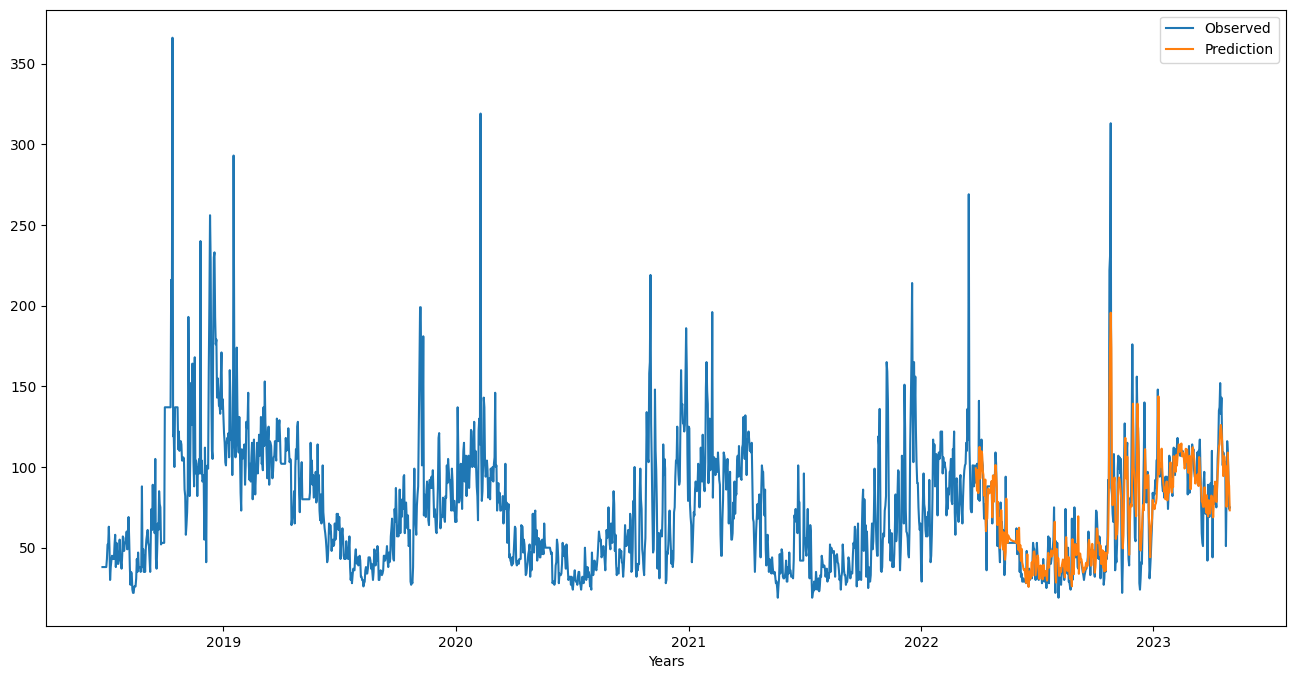

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(dt['AQI'], label='Observed')
plt.plot(predictions, label='Prediction')


plt.xlabel('Years')
plt.legend()
plt.show()

#RNN-LSTM to forecast AQI